In [43]:
# Importation des bibliothèques utilisées pour cet exemple
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import skimage

Profitons du fais que l'oeil humain a généralement moins de sensibilité à la couleur bleue pour créer une image mystère contenant une photo de chaton.

In [44]:
# Lecture d'un ficher image (utilisé l'image 1)
# Utilisez imageio.imread
img1 = iio.imread('./image_00.jpg')
img2 = iio.imread('./image_01.jpg')
img3 = iio.imread('./image_02.jpg')
print(type(img1))

<class 'numpy.ndarray'>


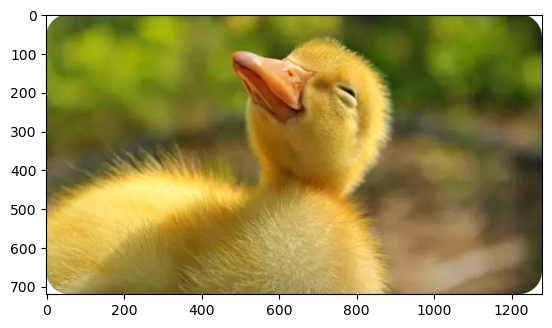

In [4]:
# Affichage d'une image : Utilisez matplotlib (plt.imshow() et plt.show())
plt.imshow(img1)
plt.show()

In [27]:
# Affichage de quelques informations au sujet de l'image (utilisez les attributes de la classe ndarray à laquelle appartient la variable img1)
print(img1.shape, img1.dtype)
print(img1[300, 800, :])

(720, 1280, 3) uint8
[238 200 119]


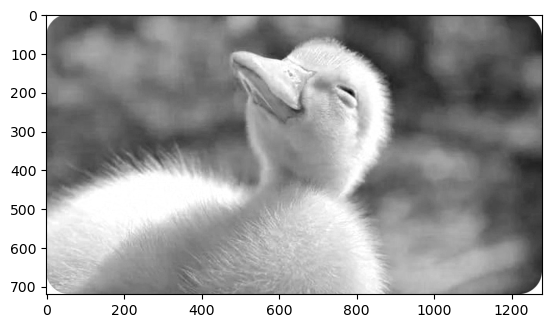

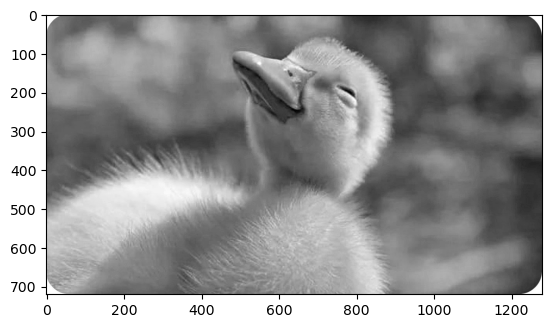

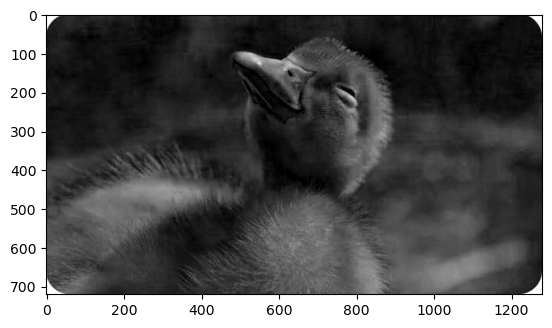

In [12]:
r_layer = img1[:, :, 0]
g_layer = img1[:, :, 1]
b_layer = img1[:, :, 2]

plt.imshow(r_layer, cmap='gray')
plt.show()

plt.imshow(g_layer, cmap='gray')
plt.show()

plt.imshow(b_layer, cmap='gray')
plt.show()

In [45]:
# Calculer la dimension minimale parmi les 3 images en X et en Y (utiliser la méthode .shape, et la fonction min)

dim_min = (img1.shape, img2.shape, img3.shape)
print(dim_min)
dim_min = min(dim_min)
print(dim_min)

min_i = dim_min[0]
min_j = dim_min[1]
print(min_i, min_j)

((720, 1280, 3), (720, 1280, 3), (882, 1563, 3))
(720, 1280, 3)
720 1280


In [46]:
# Rogner les images selon la dimension calculée plus haut
# img1 = img1[ ...i , ...j , ...k ]
img1 = img1[:min_i , :min_j , : ]
img2 = img2[:min_i , :min_j , : ]
img3 = img3[:min_i , :min_j , : ]

In [47]:
# Convertir les images RGB en niveau de gris (moyenner tous les canaux). Utiliser la méthode .mean et le bon axe
bw_img1 = img1.mean(axis=2)
bw_img2 = img2.mean(axis=2)
bw_img3 = img3.mean(axis=2)

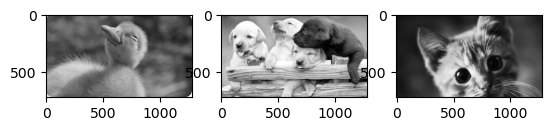

In [48]:
# Afficher les trois images dans une meme figure
# Note : utilisez plt.subplot

plt.subplot(1, 3, 1)
plt.imshow(bw_img1, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bw_img2, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(bw_img3, cmap='gray')

plt.show()


In [52]:
# Noramliser les intensités entre 0 et 1 pour les images 1 et 2, et entre 0 et 0.2 pour l'image 3.
# Utiliser: np.max

def normalization(img):
    img_min = np.min(img)
    img_max = np.max(img)
    img = (img - img_min) / (img_max - img_min)
    return img

bw_img1 = normalization(bw_img1)
bw_img2 = normalization(bw_img2)
bw_img3 = normalization(bw_img3)

In [53]:
print(bw_img1.min(), bw_img1.max()) 

0.0 1.0


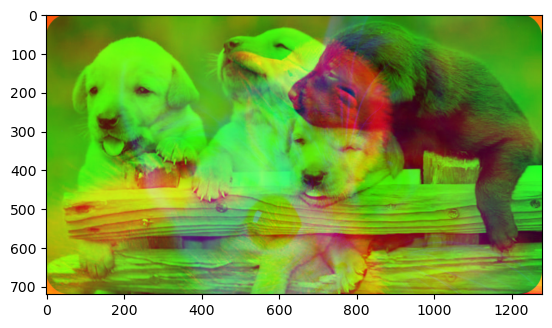

In [55]:
# Combiner les images (utilisé np.stack(..., axis=2)) pour créer 
bw_img3 = bw_img3 * 0.5

montage = np.stack([bw_img1, bw_img2, bw_img3], axis=2)

plt.imshow(montage)
plt.show()

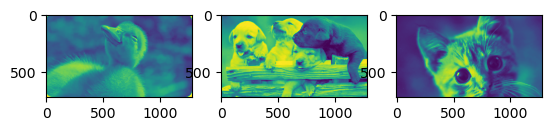

In [57]:
# Afficher les 3 canaux couleurs (indexation de l'axe 2)
canard = montage[:, :, 0]
chien = montage[:, :, 1]
chat = montage[:, :, 2]

plt.subplot(1, 3, 1)
plt.imshow(canard)

plt.subplot(1, 3, 2)
plt.imshow(chien)

plt.subplot(1, 3, 3)
plt.imshow(chat)

plt.show()


uint8
0 255


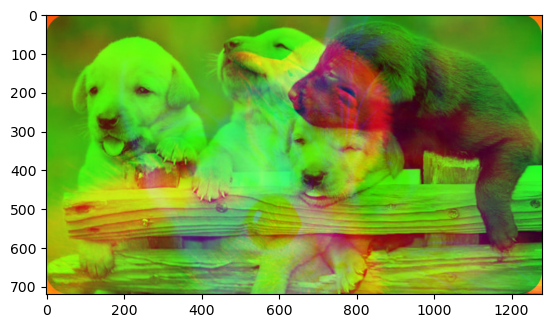

In [64]:
# Entregistrer l'image mytère sur disque sous format jpg
montage = montage * 255
montage = montage.astype(np.uint8)
print(montage.dtype)
print(montage.min(), montage.max())

plt.imshow(montage)
plt.show()

iio.imwrite('mystere.jpeg', montage)

In [27]:
# Modifier le format des pixels de l'image ne plus recevoir l'avertissement précédent. 
# * Utiliser la méthode .astype() de la classe ndarray, et le format de donnée np.uint8.
# N'oublier pas d'ajuster l'étendue des valeurs pour éviter la saturation de votre image.

# Enregistrer cette image sous un autre nom


# Suggestion de modification
* Au lieu de rogner les images, utiliser les fonctions disponibles dans le module `skimage.transform` pour redimensionner les images avant de les combiner


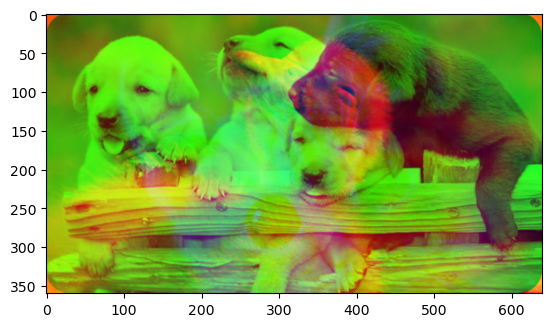

In [67]:
shape = np.array([montage.shape[0], montage.shape[1]])
shape = shape // 2

resized = skimage.transform.resize(montage, shape)

plt.imshow(resized)
plt.show()